# Importing libraries and data reading

In [662]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [663]:
data = pd.read_csv("dataset/data_science_competition_2024.csv")

# Data Exploration and Cleaning

### Data Exploration

In [664]:
data.shape

(100000, 21)

In [665]:
data.head(10)

,Unnamed: 0,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,...,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
0,0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,2022 10 29,USD,Zimbabwe,female,True,Teacher,Beitbridge,...,0,48653.011473,0.22,37,0,47,3230.038869,married,37,Did not default
1,1,368bf756-fcf2-4822-9612-f445d90b485b,other,2020 06 06,USD,Zimbabwe,other,True,Teacher,Harare,...,2,28752.062237,0.20,43,2,62,3194.139103,single,43,Did not default
2,2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,other,2023 09 29,USD,Zimbabwe,other,True,Nurse,Gweru,...,1,44797.554126,0.22,43,1,57,3330.826656,married,43,Did not default
3,3,191c62f8-2211-49fe-ba91-43556b307871,female,2022 06 22,USD,Zimbabwe,female,True,Doctor,Rusape,...,0,35681.496413,0.23,47,0,42,2246.797020,divorced,47,Did not default
4,4,477cd8a1-3b01-4623-9318-8cd6122a8346,male,2023 02 08,USD,Zimbabwe,male,True,Nurse,Chipinge,...,0,34156.055882,0.20,42,0,45,2310.858441,married,42,Did not default
5,5,3595fbe4-397c-42b1-aeb2-f85a6cdf4ee3,other,2020 11 15,USD,Zimbabwe,other,True,Data Analyst,Chimanimani,...,0,37778.075179,0.21,46,0,44,2633.653709,single,46,Did not default
6,6,a6255398-b8c6-494c-b7ff-3d7fee6703d5,male,2023 11 09,USD,Zimbabwe,male,True,Teacher,Harare,...,0,28675.968452,0.22,47,0,52,2554.371003,single,47,Did not default
7,7,b259ce87-a771-46ee-9785-b0a9f5dab2d6,female,2021 03 18,USD,Zimbabwe,female,True,Data Analyst,Marondera,...,1,38406.933711,0.22,39,1,46,2847.991485,married,39,Did not default
8,8,5f7444d0-76c9-4902-8a97-a1d134101100,other,2020 04 04,USD,Zimbabwe,other,True,Nurse,Kadoma,...,0,28015.543801,0.22,46,0,47,2521.387875,married,46,Did not default
9,9,12fb64f7-8101-4868-a2fe-83178bbaebce,male,2020 12 03,USD,Zimbabwe,male,True,Nurse,Marondera,...,1,61800.467639,0.24,37,1,43,2799.437570,divorced,37,Did not default


##### Removing unnamed: 0, loan_id, gender
* unnamed is a duplicate of the index column and should be dropped
* loan_id is a unique identify so the model may overfit to the specific load ID's
* gender and sex have the same value so iam going to drop gender column

In [666]:
data.drop(columns=["Unnamed: 0", "gender", "loan_id"], inplace=True)
data.head()

,disbursemet_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
0,2022 10 29,USD,Zimbabwe,female,True,Teacher,Beitbridge,39000.0,0,48653.011473,0.22,37,0,47,3230.038869,married,37,Did not default
1,2020 06 06,USD,Zimbabwe,other,True,Teacher,Harare,27000.0,2,28752.062237,0.20,43,2,62,3194.139103,single,43,Did not default
2,2023 09 29,USD,Zimbabwe,other,True,Nurse,Gweru,35000.0,1,44797.554126,0.22,43,1,57,3330.826656,married,43,Did not default
3,2022 06 22,USD,Zimbabwe,female,True,Doctor,Rusape,24000.0,0,35681.496413,0.23,47,0,42,2246.797020,divorced,47,Did not default
4,2023 02 08,USD,Zimbabwe,male,True,Nurse,Chipinge,19000.0,0,34156.055882,0.20,42,0,45,2310.858441,married,42,Did not default


In [667]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   disbursemet_date      100000 non-null  object 
 1   currency              100000 non-null  object 
 2   country               99900 non-null   object 
 3   sex                   100000 non-null  object 
 4   is_employed           100000 non-null  bool   
 5   job                   95864 non-null   object 
 6   location              99405 non-null   object 
 7   loan_amount           100000 non-null  float64
 8   number_of_defaults    100000 non-null  int64  
 9   outstanding_balance   100000 non-null  float64
 10  interest_rate         100000 non-null  float64
 11  age                   100000 non-null  int64  
 12  number_of_defaults.1  100000 non-null  int64  
 13  remaining term        100000 non-null  object 
 14  salary                100000 non-null  float64
 15  m

In [668]:
data.describe()

,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,salary,age.1
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000
mean,31120.000000,0.441970,36964.909763,0.210435,43.57069,0.441970,2781.804324,43.57069
std,15895.093631,0.688286,10014.758477,0.018725,4.86376,0.688286,696.450055,4.86376
min,1000.000000,0.000000,0.000000,0.100000,21.00000,0.000000,250.000000,21.00000
25%,21000.000000,0.000000,29625.227472,0.200000,40.00000,0.000000,2273.929349,40.00000
50%,31000.000000,0.000000,35063.852394,0.210000,44.00000,0.000000,2665.441567,44.00000
75%,40000.000000,1.000000,42133.388817,0.220000,47.00000,1.000000,3146.577655,47.00000
max,273000.000000,2.000000,150960.000000,0.300000,65.00000,2.000000,10000.000000,65.00000


## Data preparation

In [669]:
data.columns

Index(['disbursemet_date', 'currency', 'country', 'sex', 'is_employed', 'job',
       'location', 'loan_amount', 'number_of_defaults', 'outstanding_balance',
       'interest_rate', 'age', 'number_of_defaults.1', 'remaining term',
       'salary', 'marital_status', 'age.1', 'Loan Status'],
      dtype='object')

In [670]:
# Renaming columns
data.rename(columns={'disbursemet_date': 'disbursement_date','number_of_defaults.1':'number_of_defaults', 'remaining term':'remaining_term',
                     'age.1':'age', 'Loan Status':'loan_status'}, inplace=True)
data.columns

Index(['disbursement_date', 'currency', 'country', 'sex', 'is_employed', 'job',
       'location', 'loan_amount', 'number_of_defaults', 'outstanding_balance',
       'interest_rate', 'age', 'number_of_defaults', 'remaining_term',
       'salary', 'marital_status', 'age', 'loan_status'],
      dtype='object')

In [671]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   disbursement_date    100000 non-null  object 
 1   currency             100000 non-null  object 
 2   country              99900 non-null   object 
 3   sex                  100000 non-null  object 
 4   is_employed          100000 non-null  bool   
 5   job                  95864 non-null   object 
 6   location             99405 non-null   object 
 7   loan_amount          100000 non-null  float64
 8   number_of_defaults   100000 non-null  int64  
 9   outstanding_balance  100000 non-null  float64
 10  interest_rate        100000 non-null  float64
 11  age                  100000 non-null  int64  
 12  number_of_defaults   100000 non-null  int64  
 13  remaining_term       100000 non-null  object 
 14  salary               100000 non-null  float64
 15  marital_status    

In [672]:
data['remaining_term'] = data['remaining_term'].str.strip('_-')

In [673]:
#Convert data  'disbursement_date', 
data["disbursement_date"] = pd.to_datetime(data["disbursement_date"])
data["remaining_term"] = pd.to_numeric(data["remaining_term"])

In [674]:
data.isna().sum()

disbursement_date         0
currency                  0
country                 100
sex                       0
is_employed               0
job                    4136
location                595
loan_amount               0
number_of_defaults        0
outstanding_balance       0
interest_rate             0
age                       0
number_of_defaults        0
remaining_term            0
salary                    0
marital_status            0
age                       0
loan_status               0
dtype: int64

In [675]:
#Feeling na values with most common value on the feature
data["country"] = data["country"].fillna(data["country"].mode()[0])
data["job"] = data["job"].fillna(data["job"].mode()[0])
data["location"] = data["location"].fillna(data["location"].mode()[0])

In [676]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

### Dealing with string features

In [677]:
import math

def plot_features(_features, _data):
    num_cols = 2  # Number of columns for subplots
    num_features = len(_features)
    num_rows = math.ceil(num_features / num_cols)  # Calculate number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))  # Adjust figsize as needed

    for i, feature in enumerate(_features):
        row = i // num_cols
        col = i % num_cols

        _data[feature].value_counts().plot(kind='bar', ax=axes[row, col])
        axes[row, col].set_title(f'Bar plot for {feature}')
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel('Count')

    # Adjust layout
    plt.tight_layout()
    plt.show()

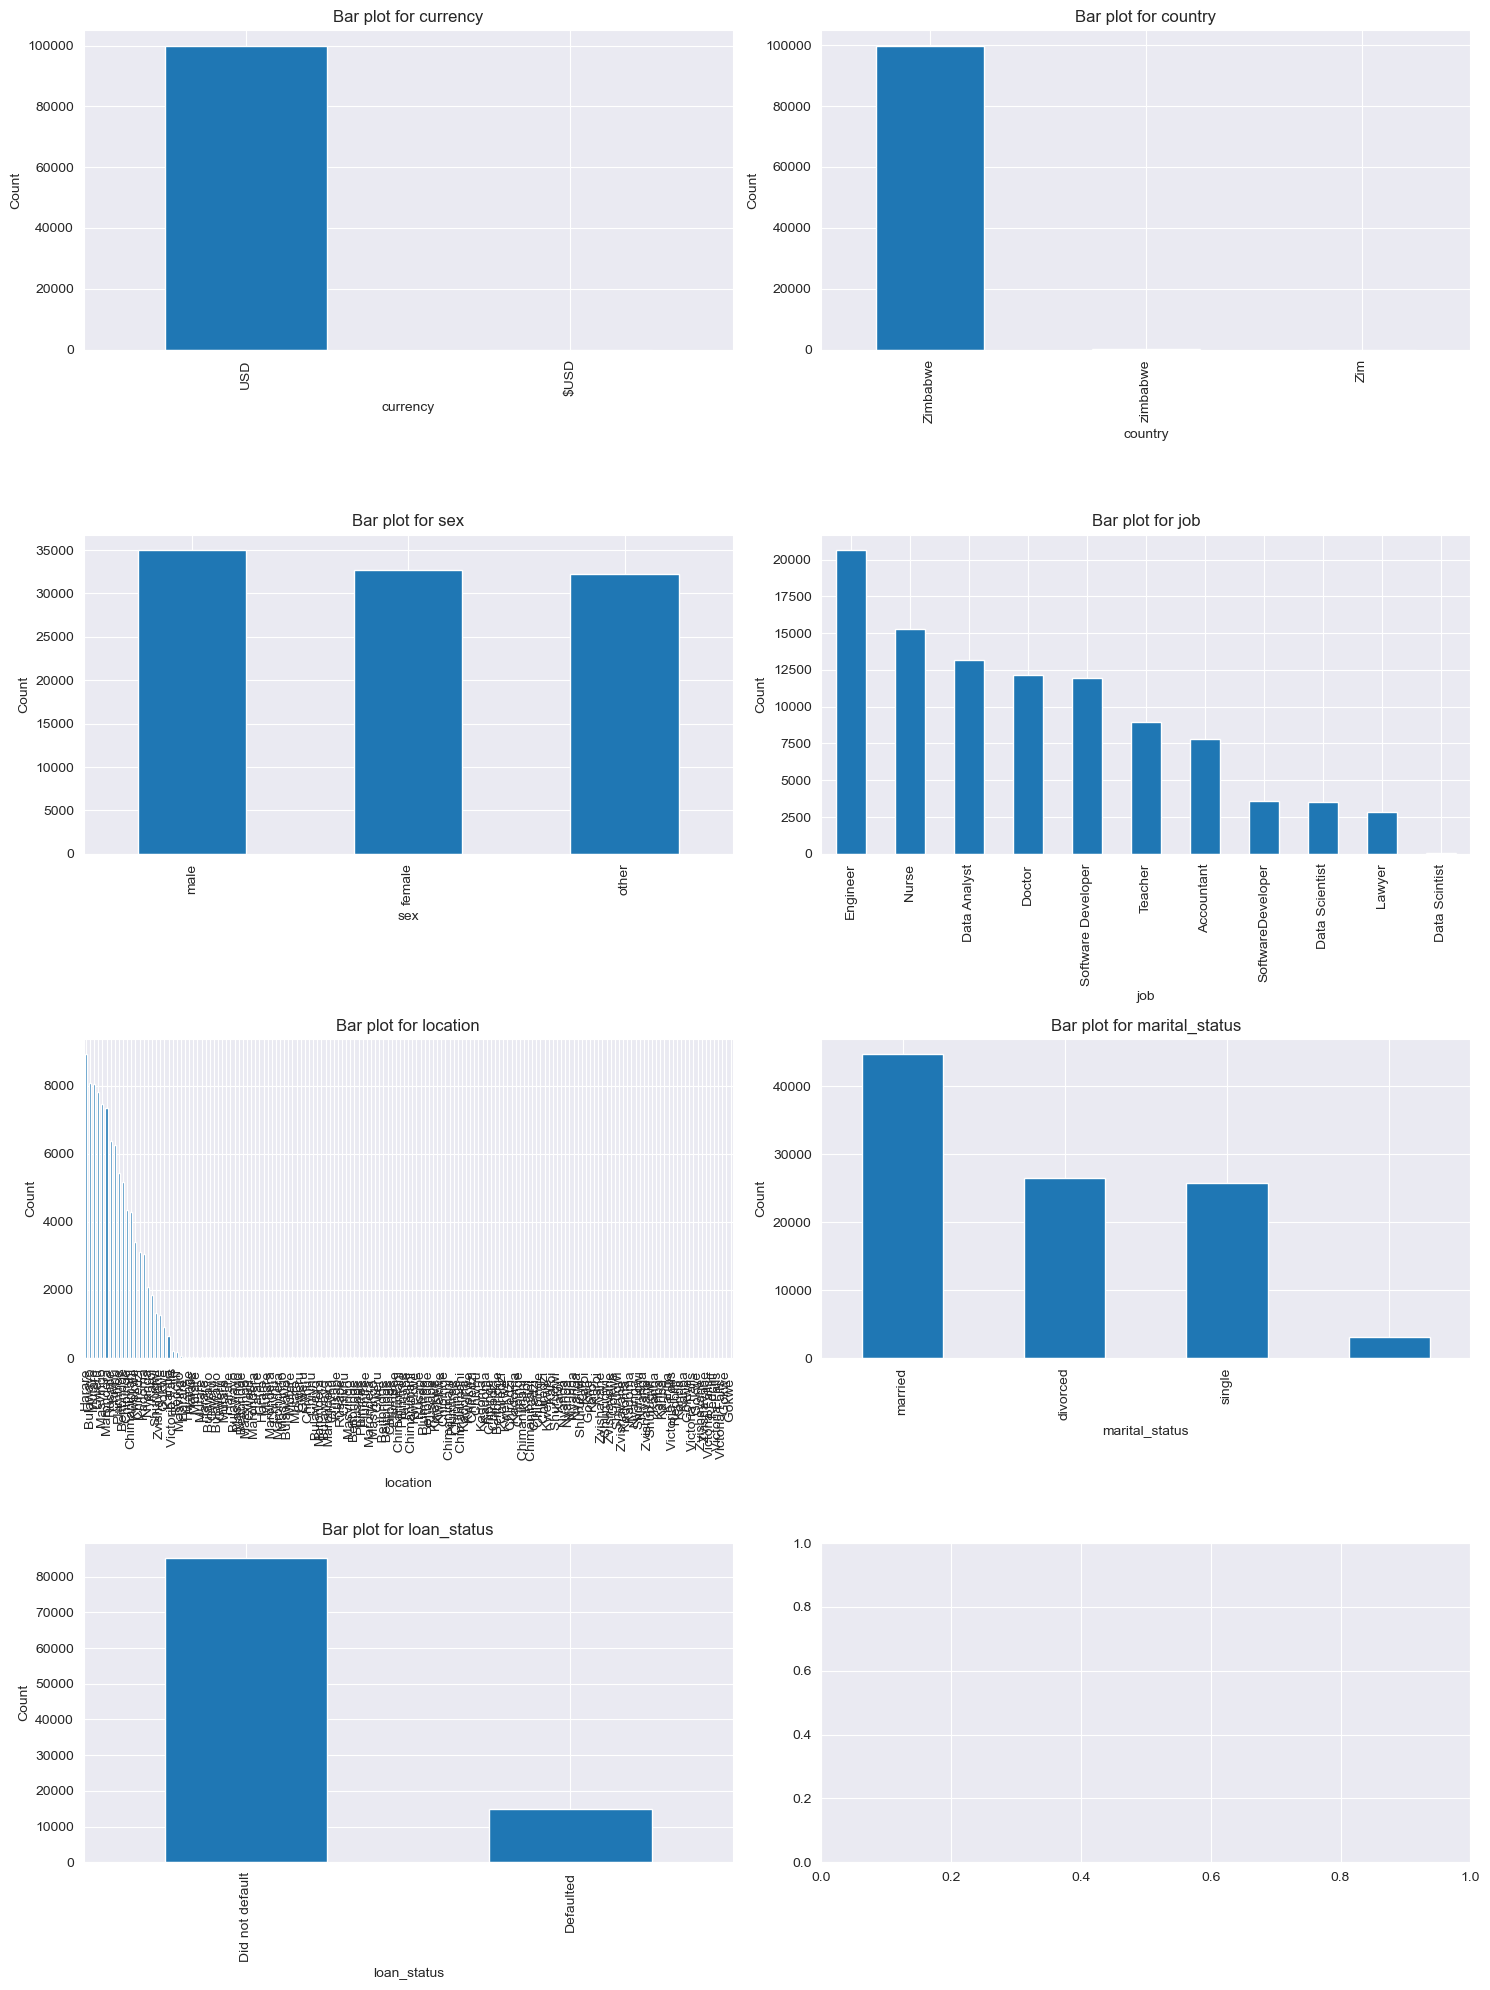

In [678]:
# Define the list of features
features = data.select_dtypes(include=[object]).columns.to_list()
plot_features(features, data)

* From the above we can see that `job`, `marital_status`, `country` and `currency` features needs to be cleaned and standardized

<Axes: xlabel='job'>

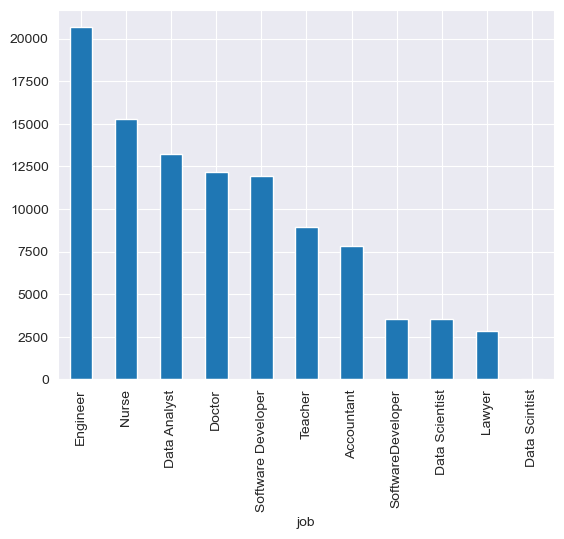

In [679]:
data["job"].value_counts().plot(kind="bar")

In [680]:
data['job'] = data['job'].str.replace(r'SoftwareDeveloper', 'Software Developer', regex=True)

In [681]:
data["job"].value_counts()

job
Engineer              20660
Software Developer    15496
Nurse                 15284
Data Analyst          13204
Doctor                12186
Teacher                8950
Accountant             7802
Data Scientist         3521
Lawyer                 2862
Data Scintist            35
Name: count, dtype: int64

In [682]:
data['country'] = data['country'].str.replace(r'(?<!\w)Zim(?!\w)', 'Zimbabwe', regex=True)
data['country'] = data['country'].str.replace(r'zimbabwe', 'Zimbabwe', regex=True)

In [683]:
data.country.value_counts()

country
Zimbabwe    100000
Name: count, dtype: int64

In [684]:
data[data["marital_status"] == " "]

,disbursement_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults,remaining_term,salary,marital_status,age,loan_status
43,2023-10-12,USD,Zimbabwe,male,True,Accountant,Nyanga,53000.0,0,47908.382308,0.22,43,0,66,4029.182109,,43,Did not default
46,2022-09-07,USD,Zimbabwe,male,True,Nurse,Rusape,21000.0,2,32010.804079,0.21,46,2,41,2172.367370,,46,Did not default
56,2020-09-07,USD,Zimbabwe,female,True,Teacher,Marondera,40000.0,2,31575.202717,0.22,40,2,56,3502.570364,,40,Did not default
164,2021-08-07,USD,Zimbabwe,other,True,Nurse,Harare,35000.0,0,35203.459313,0.21,45,0,77,3965.866597,,45,Did not default
201,2020-06-26,USD,Zimbabwe,male,True,Software Developer,Chiredzi,26000.0,0,29219.996988,0.22,44,0,44,2462.567968,,44,Did not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99860,2022-12-14,USD,Zimbabwe,male,True,Nurse,Harare,26000.0,0,33869.045205,0.22,49,0,34,1966.933126,,49,Did not default
99905,2021-04-06,USD,Zimbabwe,male,True,Doctor,Mutare,30000.0,0,43916.108935,0.22,46,0,40,2279.161532,,46,Did not default
99975,2021-05-26,USD,Zimbabwe,male,True,Doctor,Chipinge,17000.0,0,29222.426824,0.22,41,0,47,2271.360413,,41,Did not default
99979,2021-08-17,USD,Zimbabwe,other,True,Data Analyst,Mutare,33000.0,0,36943.492191,0.20,46,0,68,3318.342155,,46,Did not default


In [685]:
# data["marital_status"] = data["marital_status"].replace({"yes": 1, "no": 0})
data["marital_status"] = data["marital_status"].replace(" ", np.NAN, regex=True)
data[data["marital_status"] == " "]

,disbursement_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults,remaining_term,salary,marital_status,age,loan_status


In [686]:
#drop all nan values from marital_status feature
data.dropna(inplace=True)

In [687]:
data.shape

(96873, 18)

In [688]:
data['currency'] = data['currency'].str.replace(r'\$', '', regex=True)

In [689]:
data.currency.value_counts()

currency
USD    96873
Name: count, dtype: int64

### both the currency and country features have a single value for all records (USD for currency and Zimbabwe for country), these features are unlikely to provide meaningful predictive power for a credit score or any other target variable. Here’s why

* `Lack of Variability`: Machine learning models rely on variability in features to discern patterns and make predictions. If a feature has only one unique value (or very few unique values with overwhelming dominance), it doesn't contribute to distinguishing between different outcomes of the target variable. In your case, all records have the same value for both currency and country, so these features would not help in predicting credit scores.

* `No Discriminative Power`: Features that do not vary across records cannot differentiate between different instances or provide any information that correlates with the target variable (credit score). A feature like currency being USD for all records or country being Zimbabwe for all records does not provide any predictive power because there’s no variation to learn from.

* `Dimensionality Reduction`: In practical terms, keeping features that do not vary adds unnecessary complexity to your model without adding any value. It's generally preferable to remove such features to simplify the model and potentially improve its performance.

In [690]:
data.drop(columns=['country', 'currency'], inplace=True)

In [691]:
# Replace 'did not default' with 'default'
data['loan_status'] = data['loan_status'].replace({'Did not default': 'did_not_default', 'Defaulted': 'defaulted'})
data.loan_status.value_counts()

loan_status
did_not_default    82486
defaulted          14387
Name: count, dtype: int64

### Dealing with numerical features

#### Dealing with outliers

In [692]:
data.dropna(inplace=True)

In [693]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96873 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   disbursement_date    96873 non-null  datetime64[ns]
 1   sex                  96873 non-null  object        
 2   is_employed          96873 non-null  bool          
 3   job                  96873 non-null  object        
 4   location             96873 non-null  object        
 5   loan_amount          96873 non-null  float64       
 6   number_of_defaults   96873 non-null  int64         
 7   outstanding_balance  96873 non-null  float64       
 8   interest_rate        96873 non-null  float64       
 9   age                  96873 non-null  int64         
 10  number_of_defaults   96873 non-null  int64         
 11  remaining_term       96873 non-null  int64         
 12  salary               96873 non-null  float64       
 13  marital_status       96873 non-null 

In [694]:
def plot_multiple_features(_features, _data):
    # Calculate the number of rows needed
    n_features = len(_features)
    n_cols = 2
    n_rows = (n_features + n_cols - 1) // n_cols  # Ceiling division to ensure all features are included
    
    # Calculate the figure size
    fig_width = 10  # Adjust this based on your preference
    fig_height = n_rows * 5  # Adjust this based on the number of rows
    
    # Create subplots
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
    
    # Loop through each feature
    for i, feature in enumerate(_features):
        row = i // n_cols
        col = i % n_cols
    
        # Plot histogram with density plot
        sns.histplot(_data[feature], kde=True, bins=30, ax=axs[row, col])
    
        # Add title and labels
        axs[row, col].set_title('Distribution of ' + feature)
        axs[row, col].set_xlabel(feature)
        axs[row, col].set_ylabel("Count")
    
        # Add text annotation with comments and statistics
        stats = f"""
        feature: {feature}
        Std: {round(_data[feature].std(), 2)}
        Skewness: {round(_data[feature].skew(), 2)}
        Mean: {round(_data[feature].mean(), 2)}
        """
        
        axs[row, col].annotate(stats,
                               xy=(0.5, 0.5),
                               xycoords='axes fraction',
                               ha='center',
                               va='center',
                               fontsize=10,
                               fontfamily='sans-serif'
                               )
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

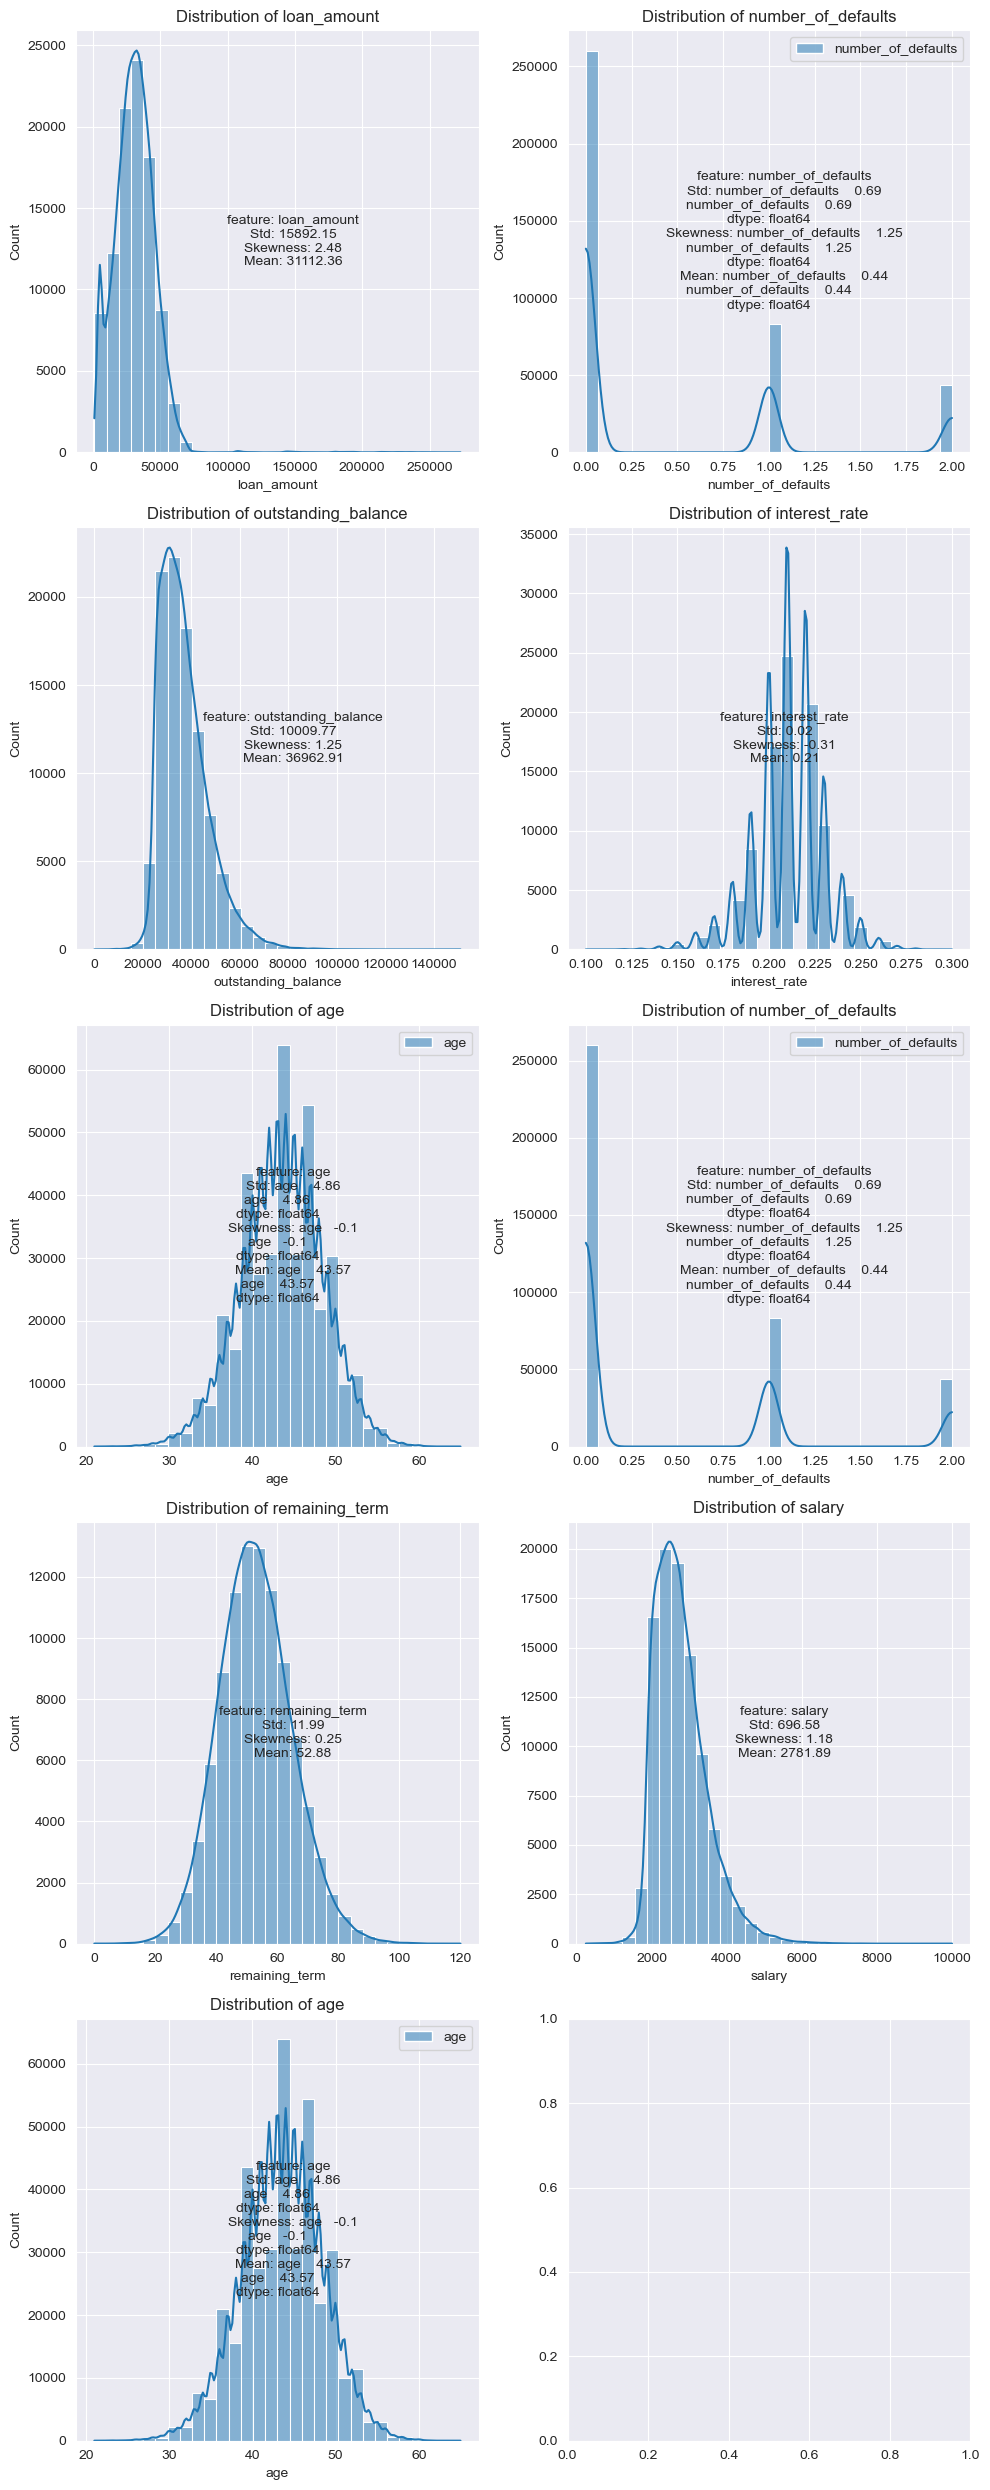

In [695]:
##### Understanding the distribution of each feature
# Define the list of features
features = data.select_dtypes(include=[int,float]).columns.to_list()

plot_multiple_features(features , data)

#### Dealing with features with potential skew
* Log Transformation: Applying a log transformation can help in reducing the skewness of a distribution, making it closer to a normal (Gaussian) distribution. This can improve the performance of many statistical and machine learning models that assume normality or benefit from it.

In [696]:
# Scale the data using the natural logarithm
# Columns to transform
columns_to_transform = ["outstanding_balance", "salary", "loan_amount"]

# Apply log transformation to each column individually
for col in columns_to_transform:
    data[col] = np.log(data[col] + 1)

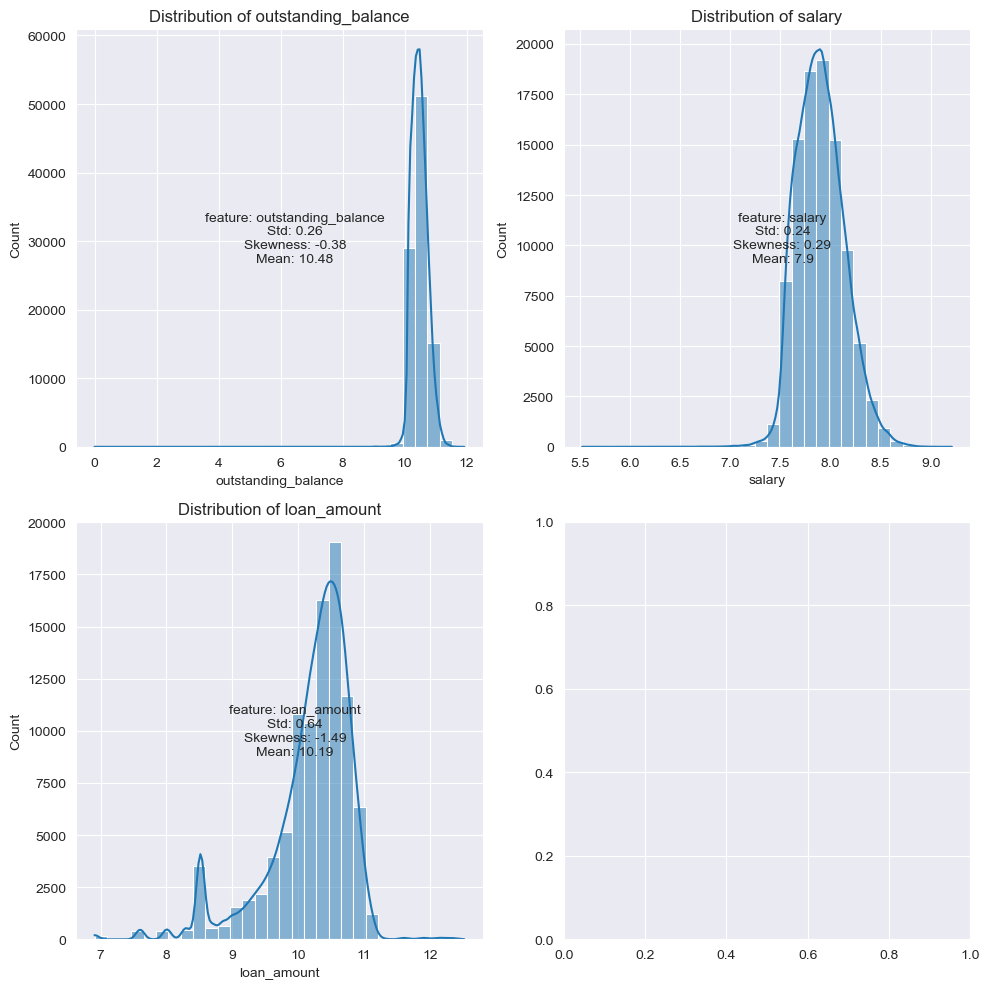

In [697]:
plot_multiple_features(columns_to_transform , data)

* Write your comments here like these features are now skewed zvakanaka etc

### Detecting and removing outliers 
* Using anomaly detection to detect and remove outliers from our dataset

In [698]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.1)  # Adjust contamination parameter
clf.fit(data[features])
outliers = clf.predict(data[features])

In [699]:
clean_data = data[outliers == 1]
outlier_data = data[outliers == -1]

#### Visualization of the removed outliers

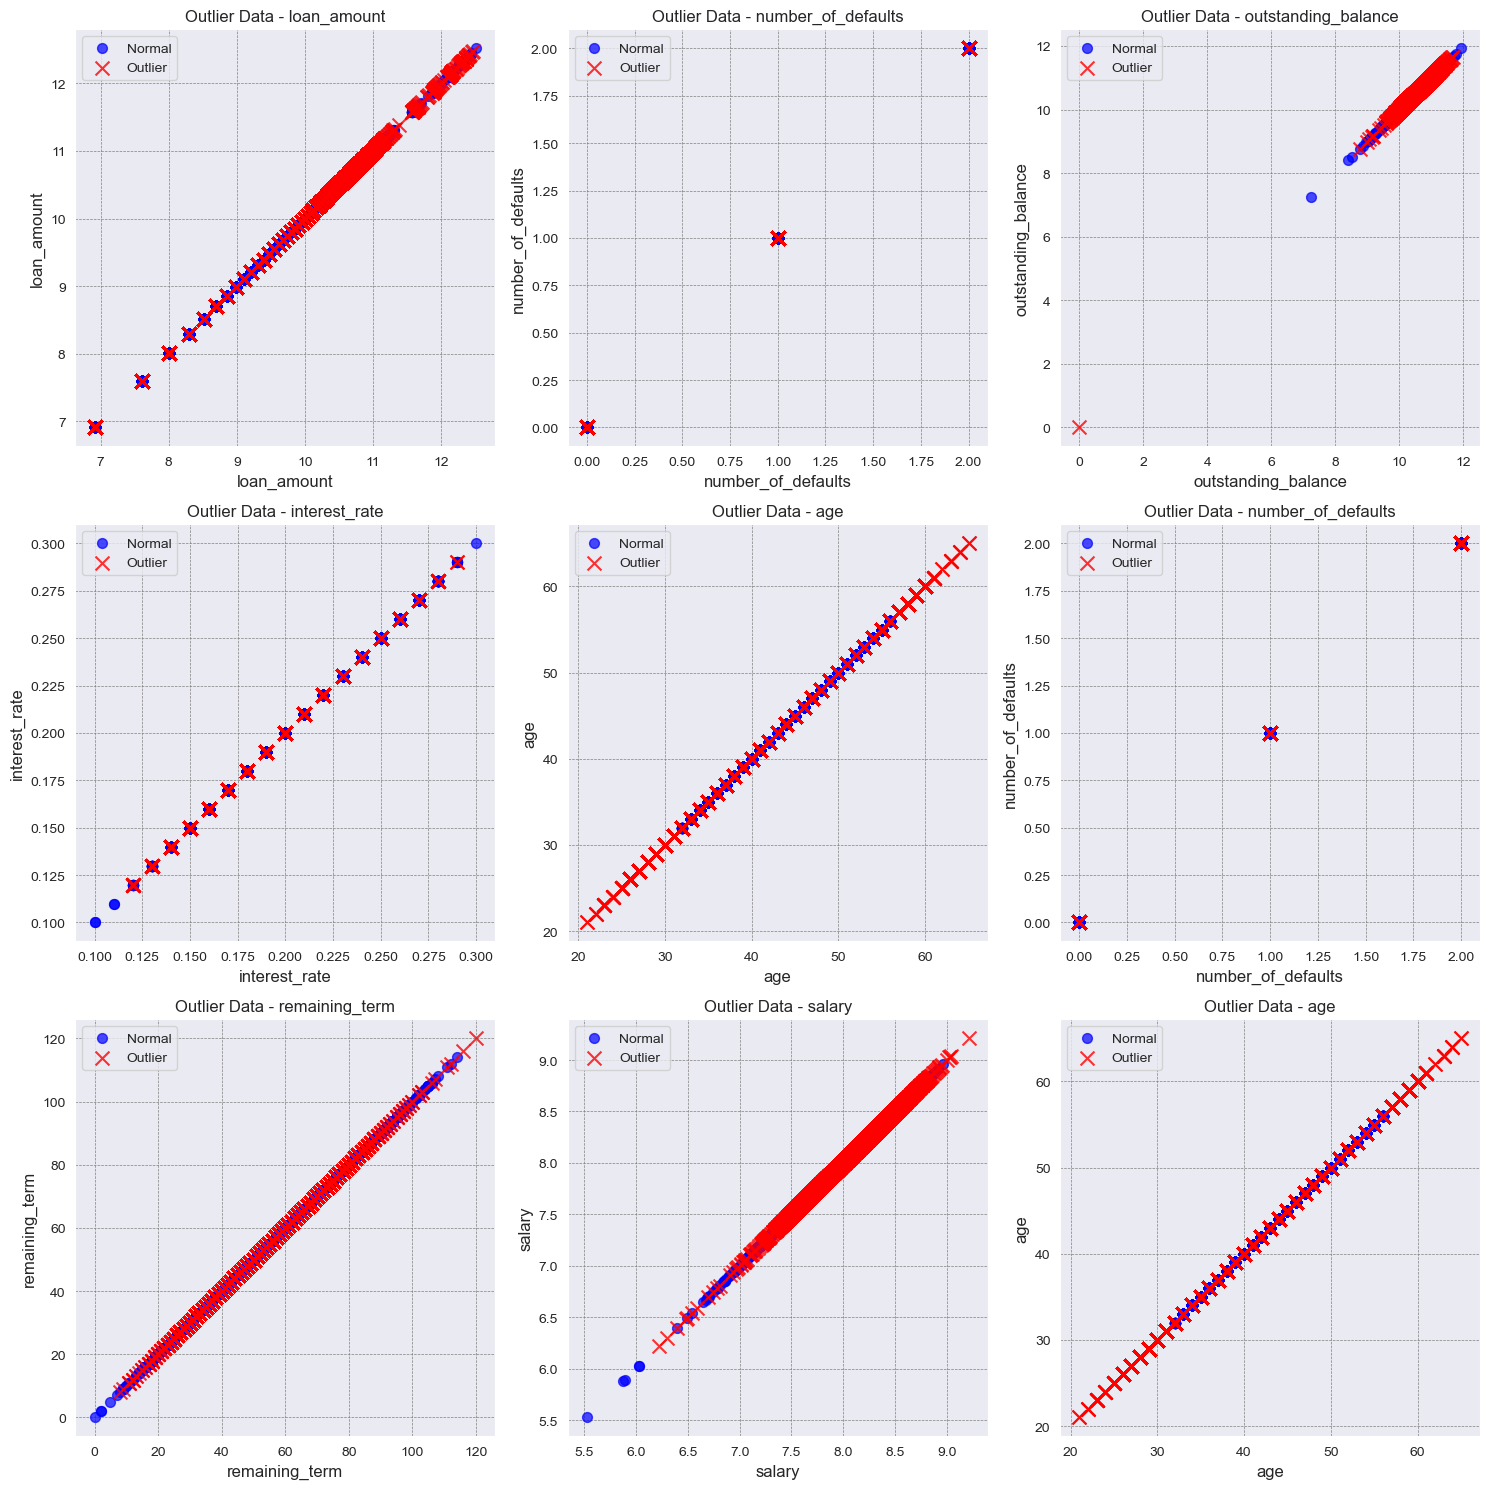

In [700]:
n_features = len(features)
nrows = 3  # Number of rows (adjust based on the number of features)
ncols = 3  # Number of columns (adjust based on the number of features)

# Check if number of subplots matches number of features
if n_features > nrows * ncols:
    raise ValueError(f"Number of features ({n_features}) exceeds available subplots ({nrows} rows, {ncols} cols)")

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 15))  # Create subplots

for i, feature in enumerate(features):
    # Calculate subplot index
    row = i // ncols
    col = i % ncols

    # Access each subplot using indexing
    ax = axes[row, col]

    # Normal data on subplot
    ax.scatter(clean_data[feature], clean_data[feature], color='blue', label='Normal', s=50, alpha=0.7, marker='o')
    ax.set_title(f'Normal Data - {feature}', fontsize=12)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel(feature, fontsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
    ax.legend(loc='upper left', fontsize=10)

    # Outliers on subplot
    ax.scatter(outlier_data[feature], outlier_data[feature], color='red', label='Outlier', s=100, alpha=0.8, marker='x')
    ax.set_title(f'Outlier Data - {feature}', fontsize=12)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel(feature, fontsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
    ax.legend(loc='upper left', fontsize=10)

# Adjust layout (optional)
plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [701]:
clean_data.shape

(87185, 16)

##### Asking Questions about the data
* NB: make sure to comment on your findings

In [702]:
clean_data.head()

,disbursement_date,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults,remaining_term,salary,marital_status,age,loan_status
0,2022-10-29,female,True,Teacher,Beitbridge,10.571343,0,10.792490,0.22,37,0,47,8.080559,married,37,did_not_default
1,2020-06-06,other,True,Teacher,Harare,10.203629,2,10.266500,0.20,43,2,62,8.069386,single,43,did_not_default
2,2023-09-29,other,True,Nurse,Gweru,10.463132,1,10.709931,0.22,43,1,57,8.111276,married,43,did_not_default
3,2022-06-22,female,True,Doctor,Rusape,10.085851,0,10.482416,0.23,47,0,42,7.717706,divorced,47,did_not_default
4,2023-02-08,male,True,Nurse,Chipinge,9.852247,0,10.438724,0.20,42,0,45,7.745807,married,42,did_not_default


#### What are the job of those who have a higher number of loans

<Figure size 1000x600 with 0 Axes>

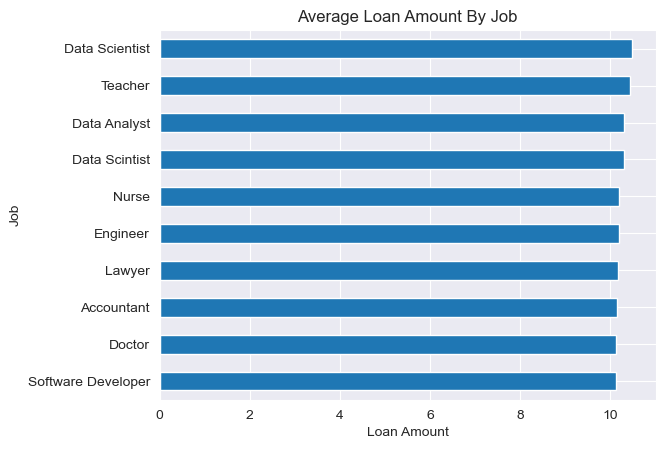

In [703]:

# Group by 'job' and calculate average loan amount and count of individuals
loan_stats = clean_data.groupby('job')['loan_amount'].agg(['mean', 'count'])

# Filter occupations with at least 2 individuals
loan_stats = loan_stats[loan_stats['count'] >= 2]  # Adjust threshold as per your data

# Sort by average loan amount
loan_stats_sorted = loan_stats.sort_values('mean')

# Set the figure size before plotting
plt.figure(figsize=(10, 6))  # Width, height in inches

# Plotting
loan_stats_sorted.plot(kind='barh', y='mean', title='Average Loan Amount By Job', legend=False)

plt.xlabel('Loan Amount')
plt.ylabel('Job')
plt.show()


#### How does loan status vary by location

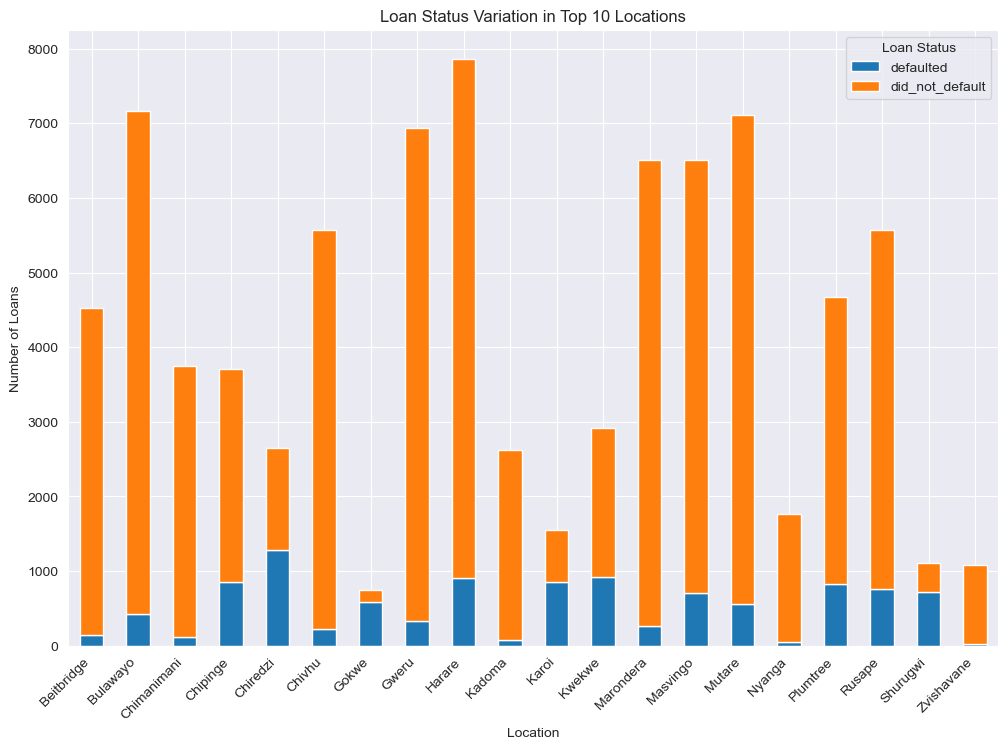

In [704]:
# Count loans by location
loan_counts_by_location = clean_data['location'].value_counts()

# Select top 10 locations by loan count
top_10_locations = loan_counts_by_location.head(20)

# Filter data for top 10 locations
df_top_10 = clean_data[clean_data['location'].isin(top_10_locations.index)]

# Group by 'location' and 'loan_status', then unstack for plotting
loan_status_by_location = df_top_10.groupby(['location', 'loan_status']).size().unstack()

# Plotting
loan_status_by_location.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Loan Status Variation in Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.legend(title='Loan Status')
plt.show()

### Is there a relationship between interest rate and loan amount?

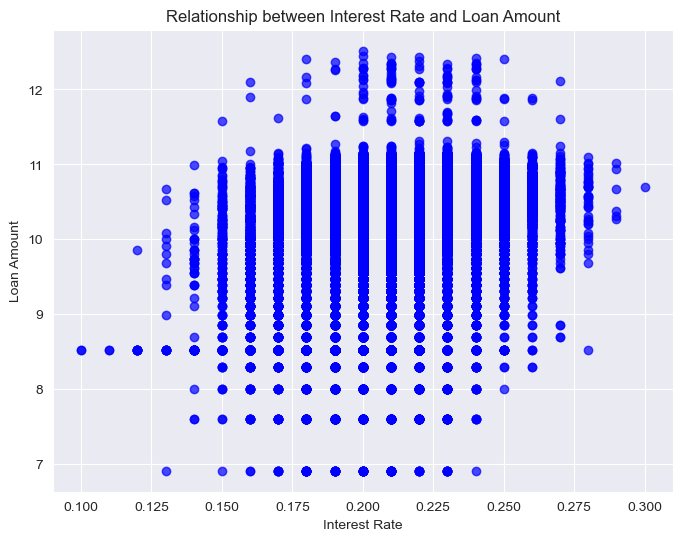

In [705]:
# Scatter plot of interest rate vs loan amount
plt.figure(figsize=(8, 6))
plt.scatter(clean_data['interest_rate'], clean_data['loan_amount'], color='b', alpha=0.7)
plt.title('Relationship between Interest Rate and Loan Amount')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.show()


#### What is the distribution of salaries among employed vs unemployed individuals?

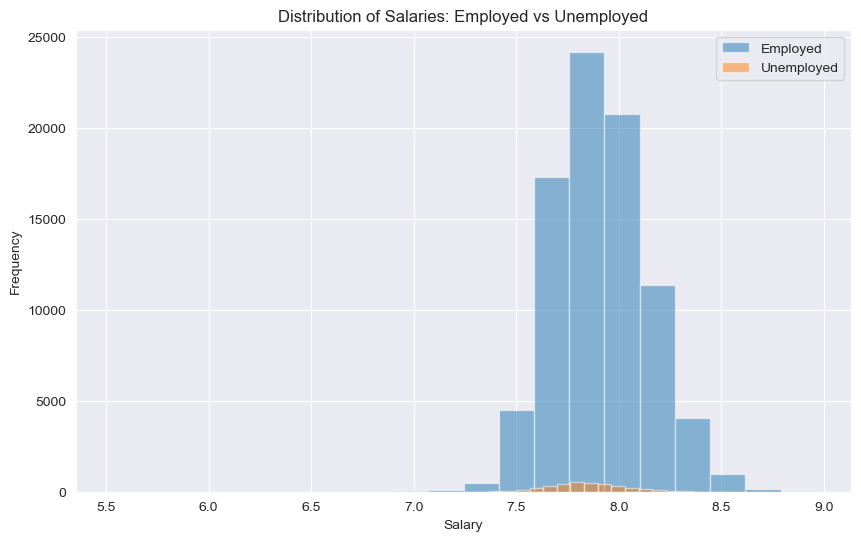

In [706]:
# Separate data by employment status
employed_salaries = clean_data[clean_data['is_employed']]['salary']
unemployed_salaries = clean_data[~clean_data['is_employed']]['salary']

# Plotting histograms
plt.figure(figsize=(10, 6))
plt.hist(employed_salaries, bins=20, alpha=0.5, label='Employed')
plt.hist(unemployed_salaries, bins=20, alpha=0.5, label='Unemployed')
plt.title('Distribution of Salaries: Employed vs Unemployed')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()


#### Which location has the highest number of loans disbursed?

In [707]:
# Count loans by location
loan_counts_by_location = clean_data['location'].value_counts()

# Identify location with the highest loan count
location_with_most_loans = loan_counts_by_location.idxmax()

print(f"Location '{location_with_most_loans}' has the highest number of loans disbursed.")


Location 'Harare' has the highest number of loans disbursed.


## Feature Engineering

In [707]:
numerical_features = data.select_dtypes(include=[int,float]).columns.to_list()
string_features = data.select_dtypes(include=[object]).columns.to_list()